In [0]:
# pip install pandas
# pip install scikit-learn
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [0]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

colNames = ['age',
  'workclass',
  'fnlwgt',
  'education',
  'education-num',
  'marital-status',
  'occupation',
  'relationship',
  'race',
  'sex',
  'capital-gain',
  'capital-loss',
  'hours-per-week',
  'native-country',
  'salary']

train_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', index_col=False, header=None,sep=',', names=colNames)
test_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', index_col=False, header=None,sep=',',names=colNames, skiprows=1)
# test_data.fnlwgt = test_data.fnlwgt.astype(int)

train_data = train_data.replace(' Holand-Netherlands', pd.np.nan).dropna(axis=0)

train_data = train_data.replace(' ?', pd.np.nan).dropna(axis=0)
test_data = test_data.replace(' ?', pd.np.nan).dropna(axis=0)

train_data = train_data.replace(' Other', pd.np.nan).dropna(axis=0)
test_data = test_data.replace(' Other', pd.np.nan).dropna(axis=0)

train_data = train_data.replace(' Amer-Indian-Eskimo', pd.np.nan).dropna(axis=0)
test_data = test_data.replace(' Amer-Indian-Eskimo', pd.np.nan).dropna(axis=0)

# train_data = train_data.replace(' Asian-Pac-Islander', pd.np.nan).dropna(axis=0)
# test_data = test_data.replace(' Asian-Pac-Islander', pd.np.nan).dropna(axis=0)

occupation = train_data['occupation']
education = train_data['education']
sex = train_data['sex']

occupation_test = test_data['occupation']
education_test = test_data['education']
sex_test = test_data['sex']

train = pd.get_dummies(train_data, columns=['workclass', 'education','marital-status','occupation','relationship','race', 'sex','native-country'])
test = pd.get_dummies(test_data, columns=['workclass', 'education','marital-status','occupation','relationship','race', 'sex','native-country'])

# print(len(train.columns.values))

train = train.replace(" >50K", 1)
train = train.replace(" <=50K", 0)
test = test.replace(" >50K.", 1)
test = test.replace(" <=50K.", 0)

train_Y = train['salary']
train_X = train.drop(columns=['salary'])

test_Y = test['salary']
test_X = test.drop(columns=['salary']) 

def get(race, sex, all):
  if (all == 0):
    return len(train_data[(train_data['sex'] == sex) & (train_data['salary'] == ' >50K') & (train_data['race'] == race)])
  else:
    return len(train_data[(train_data['sex'] == sex) & (train_data['race'] == race)])



#
# INDAGINI ESPLORATIVE SUI DATI
#

# print(train_data.groupby(sex="Female").sum())
# print(test_X['workclass'].value_counts())

#print(train_X.loc[train_X['sex']=='Female'])

print("number of males", len(train_data[(train_data['sex'] == ' Male')]))
print("number of females", len(train_data[(train_data['sex'] == ' Female')]))
print("number of white", len(train_data[(train_data['race'] == ' White')]))
print("number of black", len(train_data[(train_data['race'] == ' Black')]))


# print(train_data.columns.values)
# print(train_data['sex'].value_counts())


# print("# uomini >50K", len(train_data[(train_data['sex'] == ' Male') & (train_data['salary'] == ' >50K')]))
# print("# uomini", len(train_data[(train_data['sex'] == ' Male')]))
# print("# donne >50K", len(train_data[(train_data['sex'] == ' Female') & (train_data['salary'] == ' >50K')]))
# print("# donne", len(train_data[(train_data['sex'] == ' Female')]))

# print(up/nu - dp/nd)
# print(up/nu * 100)
# print(dp/nd * 100)
# print(test_X['race'].value_counts())

# educations = train_data['education'].unique()
# print(educations)
def man_woman():
  up = len(train_data[(train_data['sex'] == ' Male') & (train_data['salary'] == ' >50K')])
  nu = len(train_data[(train_data['sex'] == ' Male')])
  dp = len(train_data[(train_data['sex'] == ' Female') & (train_data['salary'] == ' >50K')])
  nd = len(train_data[(train_data['sex'] == ' Female')])
  print(up/nu - dp/nd)

def black_white():
  up = len(train_data[(train_data['race'] == ' White') & (train_data['salary'] == ' >50K')])
  nu = len(train_data[(train_data['race'] == ' White')])
  dp = len(train_data[(train_data['race'] == ' Black') & (train_data['salary'] == ' >50K')])
  nd = len(train_data[(train_data['race'] == ' Black')])
  print(up/nu - dp/nd)
  # print(dp)
  # print(nd)

# black_white()

def man_woman_by_education():
  educations = train_data['education'].unique()
  for edu in educations:
    uomini = len(train_data[(train_data['sex'] == ' Male') & (train_data['salary'] == ' >50K') & (train_data['education'] == edu)])
    uomini_tot = len(train_data[(train_data['sex'] == ' Male') & (train_data['education'] == edu)])
    donne = len(train_data[(train_data['sex'] == ' Female') & (train_data['salary'] == ' >50K') & (train_data['education'] == edu)])
    donne_tot = len(train_data[(train_data['sex'] == ' Female') & (train_data['education'] == edu)])

    print(edu, uomini/uomini_tot - donne/donne_tot)

def black_white_by_education():
  educations = train_data['education'].unique()
  for edu in educations:
    biachi = len(train_data[(train_data['race'] == ' White') & (train_data['salary'] == ' >50K') & (train_data['education'] == edu)])
    biachi_tot = len(train_data[(train_data['race'] == ' White') & (train_data['education'] == edu)])
    neri = len(train_data[(train_data['race'] == ' Black') & (train_data['salary'] == ' >50K') & (train_data['education'] == edu)])
    neri_tot = len(train_data[(train_data['race'] == ' Black') & (train_data['education'] == edu)])

    print(edu, biachi/biachi_tot - neri/neri_tot)

# sexes = train_data['sex'].unique()
# races = train_data['race'].unique()

def by_sex_by_race():
  sexes = train_data['sex'].unique()
  races = train_data['race'].unique()

  for sex in sexes:
    for race in races:
      # a = len(train_data[(train_data['sex'] == sex) & (train_data['salary'] == ' >50K') & (train_data['race'] == race)])
      a = get(race, sex, 0)
      aa = get(race, sex, 1)

      for sex2 in sexes:
        for race2 in races:
          b = get(race2, sex2, 0)
          bb = get(race2, sex2, 1)

          print(sex,"-", race, "|", sex2,"-",race2, a/aa - b/bb)


def man_woman_by_occupation():
  occupations = train_data['occupation'].unique()
  for edu in occupations:
    uomini = len(train_data[(train_data['sex'] == ' Male') & (train_data['salary'] == ' >50K') & (train_data['occupation'] == edu)])
    uomini_tot = len(train_data[(train_data['sex'] == ' Male') & (train_data['occupation'] == edu)])
    donne = len(train_data[(train_data['sex'] == ' Female') & (train_data['salary'] == ' >50K') & (train_data['occupation'] == edu)])
    donne_tot = len(train_data[(train_data['sex'] == ' Female') & (train_data['occupation'] == edu)])

    # biachi = len(train_data[(train_data['race'] == ' White') & (train_data['salary'] == ' >50K') & (train_data['occupation'] == edu)])
    # biachi_tot = len(train_data[(train_data['race'] == ' White') & (train_data['occupation'] == edu)])
    # neri = len(train_data[(train_data['race'] == ' Black') & (train_data['salary'] == ' >50K') & (train_data['occupation'] == edu)])
    # neri_tot = len(train_data[(train_data['race'] == ' Black') & (train_data['occupation'] == edu)])

    if ((uomini_tot != 0) and (donne_tot != 0)):
      print(edu, uomini/uomini_tot - donne/donne_tot)
    # print(edu, biachi/biachi_tot - neri/neri_tot)  

'''
def black_white_by_occupation():
  occupations = train_data['occupation'].unique()
  for edu in occupations:
    # uomini = len(train_data[(train_data['sex'] == ' Male') & (train_data['salary'] == ' >50K') & (train_data['occupation'] == edu)])
    # uomini_tot = len(train_data[(train_data['sex'] == ' Male') & (train_data['occupation'] == edu)])
    # donne = len(train_data[(train_data['sex'] == ' Female') & (train_data['salary'] == ' >50K') & (train_data['occupation'] == edu)])
    # donne_tot = len(train_data[(train_data['sex'] == ' Female') & (train_data['occupation'] == edu)])

    biachi = len(train_data[(train_data['race'] == ' White') & (train_data['salary'] == ' >50K') & (train_data['occupation'] == edu)])
    biachi_tot = len(train_data[(train_data['race'] == ' White') & (train_data['occupation'] == edu)])
    neri = len(train_data[(train_data['race'] == ' Black') & (train_data['salary'] == ' >50K') & (train_data['occupation'] == edu)])
    neri_tot = len(train_data[(train_data['race'] == ' Black') & (train_data['occupation'] == edu)])

    print(edu, biachi/biachi_tot - neri/neri_tot)  

# print(train_data['hours-per-week'].value_counts())

def black_white_by_hours():
  hours = train_data['hours-per-week'].unique()
  for hour in hours:
    # uomini = len(train_data[(train_data['sex'] == ' Male') & (train_data['salary'] == ' >50K') & (train_data['occupation'] == edu)])
    # uomini_tot = len(train_data[(train_data['sex'] == ' Male') & (train_data['education'] == edu)])
    # donne = len(train_data[(train_data['sex'] == ' Female') & (train_data['salary'] == ' >50K') & (train_data['occupation'] == edu)])
    # donne_tot = len(train_data[(train_data['sex'] == ' Female') & (train_data['education'] == edu)])

    biachi = len(train_data[(train_data['race'] == ' White') & (train_data['salary'] == ' >50K') & (train_data['hours-per-week'] == hour)])
    biachi_tot = len(train_data[(train_data['race'] == ' White') & (train_data['hours-per-week'] == hour)])
    neri = len(train_data[(train_data['race'] == ' Black') & (train_data['salary'] == ' >50K') & (train_data['hours-per-week'] == hour)])
    neri_tot = len(train_data[(train_data['race'] == ' Black') & (train_data['hours-per-week'] == hour)])

    print(hour, bianchi/bianchi_tot - neri/neri_tot)

def man_woman_by_hours():
  hours = train_data['hours-per-week'].unique()
  for hour in hours:
    # uomini = len(train_data[(train_data['sex'] == ' Male') & (train_data['salary'] == ' >50K') & (train_data['occupation'] == edu)])
    # uomini_tot = len(train_data[(train_data['sex'] == ' Male') & (train_data['education'] == edu)])
    # donne = len(train_data[(train_data['sex'] == ' Female') & (train_data['salary'] == ' >50K') & (train_data['occupation'] == edu)])
    # donne_tot = len(train_data[(train_data['sex'] == ' Female') & (train_data['education'] == edu)])

    biachi = len(train_data[(train_data['sex'] == ' Male') & (train_data['salary'] == ' >50K') & (train_data['hours-per-week'] == hour)])
    biachi_tot = len(train_data[(train_data['sex'] == ' Male') & (train_data['hours-per-week'] == hour)])
    neri = len(train_data[(train_data['sex'] == ' Female') & (train_data['salary'] == ' >50K') & (train_data['hours-per-week'] == hour)])
    neri_tot = len(train_data[(train_data['sex'] == ' Female') & (train_data['hours-per-week'] == hour)])

    print(hour, biachi/biachi_tot - neri/neri_tot)
    '''




print(man_woman())
# black_white()
# man_woman_by_education()
# black_white_by_education()
# man_woman_by_hours()
# black_white_by_hours()
# print("education")
# man_woman_by_education()
# black_white_by_occupation()
# print("occupation")
# man_woman_by_occupation()

# print(train_data['race'].value_counts())

# clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(train_X, train_Y)
# print(clf.score(test_X, test_Y))



number of males 20057
number of females 9587
number of white 25932
number of black 2817
0.20247105907754015
None


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

#scaler = StandardScaler()
#scaler.fit(train_X[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']])
#print(train_X[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']])
#train_X[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']] = scaler.transform(train_X[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']])
#print(train_X[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']])
logistic_model = LogisticRegression(tol=0.00000001)
logistic_model.fit(train_X,train_Y)

predict_train = logistic_model.predict(train_X)
predict_test = logistic_model.predict(test_X)


# print(test_X.columns.values)

print("Model's Accuracy test       :",logistic_model.score(test_X, test_Y))
print("Model's Accuracy training       :",logistic_model.score(train_X, train_Y))
'''

pred_frame = test_X.copy(deep=True)
pred_frame['y'] = predict_test

# # equal numero di uomini e donne e' classificato >50K no unfairness (pero' questa cosa e' vera perche' ci sono un sacco di donne FP quindi la cosa bilancia)
# up = len(pred_frame[(pred_frame['sex_ Male'] == 1) & (pred_frame['y'] == 1)])
# nu = len(pred_frame[(pred_frame['sex_ Male'] == 1)])
# dp = len(pred_frame[(pred_frame['sex_ Female'] == 1) & (pred_frame['y'] == 1)])
# nd = len(pred_frame[(pred_frame['sex_ Female'] == 1)])
# print(up/nu - dp/nd)

# # equal numero di biachi e neri e' classificato >50K no unfairness
# up = len(pred_frame[(pred_frame['race_ White'] == 1) & (pred_frame['y'] == 1)])
# nu = len(pred_frame[(pred_frame['race_ White'] == 1)])
# dp = len(pred_frame[(pred_frame['race_ Black'] == 1) & (pred_frame['y'] == 1)])
# nd = len(pred_frame[(pred_frame['race_ Black'] == 1)])
# print(up/nu - dp/nd)

# ################################################################################
pred_frame2 = test_X.copy(deep=True)
pred_frame2['y'] = test_Y

# up = len(pred_frame2[(pred_frame2['sex_ Male'] == 1) & (pred_frame2['y'] == 1)])
# nu = len(pred_frame2[(pred_frame2['sex_ Male'] == 1)])
# dp = len(pred_frame2[(pred_frame2['sex_ Female'] == 1) & (pred_frame2['y'] == 1)])
# nd = len(pred_frame2[(pred_frame2['sex_ Female'] == 1)])
# print(up/nu - dp/nd)

# up = len(pred_frame2[(pred_frame2['race_ White'] == 1) & (pred_frame2['y'] == 1)])
# nu = len(pred_frame2[(pred_frame2['race_ White'] == 1)])
# dp = len(pred_frame2[(pred_frame2['race_ Black'] == 1) & (pred_frame2['y'] == 1)])
# nd = len(pred_frame2[(pred_frame2['race_ Black'] == 1)])
# print(up/nu - dp/nd)

################################################################################

dd = test_data.copy(deep=True)
dd['y'] = predict_test

# uomini donne
# uomini fP
ufp = len(dd[(dd['sex'] == ' Male') & (dd['salary'] == ' <=50K.') & (dd['y'] == 1)])
utp = len(dd[(dd['sex'] == ' Male') & (dd['salary'] == ' >50K.') & (dd['y'] == 1)])

uratio = ufp/(ufp+utp)

dfp = len(dd[(dd['sex'] == ' Female') & (dd['salary'] == ' <=50K.') & (dd['y'] == 1)])
dtp = len(dd[(dd['sex'] == ' Female') & (dd['salary'] == ' >50K.') & (dd['y'] == 1)])
dratio = dfp/(dfp+dtp)

print("FP Ratio Male|Female")
print(uratio, dratio)


################################################################################
# fn tn

ufp = len(dd[(dd['sex'] == ' Male') & (dd['salary'] == ' >50K.') & (dd['y'] == 0)])
utp = len(dd[(dd['sex'] == ' Male') & (dd['salary'] == ' <=50K.') & (dd['y'] == 0)])

uratio = ufp/(ufp+utp)

dfp = len(dd[(dd['sex'] == ' Female') & (dd['salary'] == ' >50K.') & (dd['y'] == 0)])
dtp = len(dd[(dd['sex'] == ' Female') & (dd['salary'] == ' <=50K.') & (dd['y'] == 0)])
dratio = dfp/(dfp+dtp)

print("FN Ratio Male|Female")
print(uratio, dratio)
'''

Model's Accuracy test       : 0.8475218067482588
Model's Accuracy training       : 0.8481986236675213


'\n\npred_frame = test_X.copy(deep=True)\npred_frame[\'y\'] = predict_test\n\n# # equal numero di uomini e donne e\' classificato >50K no unfairness (pero\' questa cosa e\' vera perche\' ci sono un sacco di donne FP quindi la cosa bilancia)\n# up = len(pred_frame[(pred_frame[\'sex_ Male\'] == 1) & (pred_frame[\'y\'] == 1)])\n# nu = len(pred_frame[(pred_frame[\'sex_ Male\'] == 1)])\n# dp = len(pred_frame[(pred_frame[\'sex_ Female\'] == 1) & (pred_frame[\'y\'] == 1)])\n# nd = len(pred_frame[(pred_frame[\'sex_ Female\'] == 1)])\n# print(up/nu - dp/nd)\n\n# # equal numero di biachi e neri e\' classificato >50K no unfairness\n# up = len(pred_frame[(pred_frame[\'race_ White\'] == 1) & (pred_frame[\'y\'] == 1)])\n# nu = len(pred_frame[(pred_frame[\'race_ White\'] == 1)])\n# dp = len(pred_frame[(pred_frame[\'race_ Black\'] == 1) & (pred_frame[\'y\'] == 1)])\n# nd = len(pred_frame[(pred_frame[\'race_ Black\'] == 1)])\n# print(up/nu - dp/nd)\n\n# #################################################

In [0]:
# this function calculate delta for the algorithm
# il gender da passare deve essere 'sex_ Male' oppure 'sex_Female'
def delta(gender, train_data):
  g = len(train_data[(train_data[gender] == 1)])

  p = len(train_data[(train_data[gender] == 1) & (train_data['truth'] == 1)])
  p = p/g

  males = len(train_data[(train_data['sex_ Male'] == 1)])
  females = len(train_data[(train_data['sex_ Female'] == 1)])

  p_star = ((len(train_data[(train_data['sex_ Male'] == 1) & (train_data['truth'] == 1)]) / males) + len(train_data[(train_data['sex_ Female'] == 1) & (train_data['truth'] == 1)]) / females)/2

  return g*abs(p-p_star)

# this function find the decision boundary given the ranking returned by the ranker model
def decisionBoundary(arr):
  for i in range(0, len(arr)):
    # dio = arr.iloc[[i]]
    # print(arr.iloc[[i]][['prob']] >= 0.50)
    if(arr.iloc[[i]][['prob']]['prob'].item() >= 0.50):
      return i


frame = train_X.copy(deep=True)
frame['truth'] = train_Y
# semplicemente per inizializzare
frame['education'] = education
frame['sex'] = sex
frame['occupation'] = occupation
frame['prob'] = train_Y 
# ricordarsi di far partire tutto da capo che frame è cambiato
# stampa probabilità prima di aver messo apposto le cose
# probabilità di avere income > 50k sapendo di essere un maschio
prob1 = len(frame[(frame['sex_ Male'] == 1) & (frame['truth'] == 1)])/len(frame[(frame['sex_ Male'] == 1)])
# probabilità di avere income > 50k sapendo di essere una femmina
prob2 = len(frame[(frame['sex_ Female'] == 1) & (frame['truth'] == 1)])/len(frame[(frame['sex_ Female'] == 1)])
# probabilità di avere un income >50k secondo formula eq. 4
prob3 = (prob1 + prob2)/2
# NB in teoria la P* dovrebbe essere fissata e calcolata una sola volta, ora vogliamo bilanciare il dataset fino a quando non succede che le due probabilità diventano come la media delle due
print("Probabilità di avere income > 50k sapendo di essere maschio:",prob1)
print("Probabilità di avere income > 50k sapendo di essere donna:",prob2)
print("Probabilità media per il bilanciamento del dataset:",prob3)

# maschi e femmine con un income alto prima di effettuare modifiche al dataset
print("Maschi con income alto:",len(frame[(frame['sex_ Male'] == 1) & (frame['truth'] == 1)]))
print("Femmine con income alto:", len(frame[(frame['sex_ Female'] == 1) & (frame['truth'] == 1)]))

while abs(prob1 - prob2) > 0.002:
  # alleno un nuovo ranker ogni volta
  train_Y = frame['truth']
  education = frame['education']
  sex = frame['sex']
  occupation = frame['occupation']
  frame = frame.drop(columns=['truth'])
  frame = frame.drop(columns=['prob'])
  frame = frame.drop(columns=['education'])
  frame = frame.drop(columns=['occupation'])
  frame = frame.drop(columns=['sex'])
  logistic_model.fit(frame, train_Y)
  
  ranker = logistic_model.predict_proba(frame)
  frame['truth'] = train_Y

  frame['prob'] = ranker[:,1]
  frame['education'] = education
  frame['sex'] = sex
  frame['occupation'] = occupation

  frame = frame.sort_values(['prob'], ascending=[1])
  frame.reset_index(drop=True, inplace=True)

  # dividiamo i due insiemi in modo da lavorare sugli insiemi divisi
  males = frame[(frame['sex_ Male'] == 1)] 
  females = frame[(frame['sex_ Female'] == 1)] 

  # l'idea è che dobbiamo alzare la probabilità di income buono per le donne e diminuire quella degli uomini per rendere fair il dataset

  # trovo il decision boundary per i maschi in base a ciò che il ranker mi ha restituito
  if abs(prob1 - prob3) > 0.001:
    malesBoundary = decisionBoundary(males)
    #print("Decision boundary for males:", malesBoundary)
    #print("Maschio prima del boundary", males.iloc[[malesBoundary - 1]])
    #print("Maschio dopo il boundary", males.iloc[[malesBoundary]])
    # calcolo del delta per la rimozione/duplicazione
    d = delta('sex_ Male', frame) / 2

    # elimino 1/2 * delta maschi positivi sopra al boundary
    #males = males.drop(males.index[malesBoundary:(malesBoundary + int(d))])
    #print("dimensione prima",len(males))
    count = 0
    ind = malesBoundary
    while ind < len(males) and count < int(d):
      if males.iloc[[ind]][['truth']]['truth'].item() == 1:
        males.drop(males.index[[ind]], inplace=True)
        count = count + 1
      else:
        ind = ind + 1

    # fase duplicazione record: duplico 1/2 * delta maschi negativi sotto il boundary
    #duplicated = pd.DataFrame(np.repeat(males.index[(malesBoundary - int(d)):malesBoundary],1))
    count = 0
    ind = malesBoundary - 1
    while ind >= 0 and count < int(d):
      if males.iloc[[ind]][['truth']]['truth'].item() == 0:
        males = males.append(males.iloc[[ind]])
        count = count + 1
      ind = ind - 1

    #print("dopo",len(males))

  # femmine
  if abs(prob2 - prob3) > 0.001:

    femalesBoundary = decisionBoundary(females)
    df = delta('sex_ Female', frame) / 2 

    
    count = 0
    ind = femalesBoundary
    while ind < len(females) and count < int(df):
      if females.iloc[[ind]][['truth']]['truth'].item() == 1:
        females = females.append(females.iloc[[ind]])
        count = count + 1
      ind = ind + 1

    count = 0
    ind = femalesBoundary - 1
    while ind >= 0 and count < int(df):
      if females.iloc[[ind]][['truth']]['truth'].item() == 0:
        females.drop(females.index[[ind]], inplace=True)
        count = count + 1
      ind = ind - 1

    # dubbio, forse il ranking dovrebbe fare in modo che arrivati al decision boundary tutti gli esempi di destra devono essere positivi, però come può essere legato alla ground truth?
    # dopo essere arrivati qui abbiamo fatto ciclare un primo giro per cercare di mettere a posto le cose

    # modifico il dataset iniziale
  frame = males.append(females)
  # stampa probabilità dopo aver messo apposto le cose
  # probabilità di avere income > 50k sapendo di essere un maschio
  prob1 = len(frame[(frame['sex_ Male'] == 1) & (frame['truth'] == 1)])/len(frame[(frame['sex_ Male'] == 1)])
  # probabilità di avere income > 50k sapendo di essere una femmina
  prob2 = len(frame[(frame['sex_ Female'] == 1) & (frame['truth'] == 1)])/len(frame[(frame['sex_ Female'] == 1)])
  print("Probabilità di avere income > 50k sapendo di essere maschio:",prob1)
  print("Probabilità di avere income > 50k sapendo di essere donna:",prob2)
  print("Probabilità media per il bilanciamento del dataset:",prob3)
  # probabilità di avere un income >50k secondo formula eq. 4
  #prob3 = (prob1 + prob2)/2
  #print("Probabilità media per il bilanciamento del dataset:",prob3)
  print("Maschi con income alto:",len(frame[(frame['sex_ Male'] == 1) & (frame['truth'] == 1)]))
  print("Femmine con income alto:", len(frame[(frame['sex_ Female'] == 1) & (frame['truth'] == 1)]))
  print("Numero maschi nel dataset:",len(frame[(frame['sex_ Male'] == 1)]))
  print("Numero femmine nel dataset:",len(frame[(frame['sex_ Female'] == 1)]))

Probabilità di avere income > 50k sapendo di essere maschio: 0.3168968439946154
Probabilità di avere income > 50k sapendo di essere donna: 0.11442578491707521
Probabilità media per il bilanciamento del dataset: 0.2156613144558453
Maschi con income alto: 6356
Femmine con income alto: 1097
Probabilità di avere income > 50k sapendo di essere maschio: 0.26629107044921974
Probabilità di avere income > 50k sapendo di essere donna: 0.16501512464796078
Probabilità media per il bilanciamento del dataset: 0.2156613144558453
Maschi con income alto: 5341
Femmine con income alto: 1582
Numero maschi nel dataset: 20057
Numero femmine nel dataset: 9587
Probabilità di avere income > 50k sapendo di essere maschio: 0.24101311262900732
Probabilità di avere income > 50k sapendo di essere donna: 0.19025764055491812
Probabilità media per il bilanciamento del dataset: 0.2156613144558453
Maschi con income alto: 4834
Femmine con income alto: 1824
Numero maschi nel dataset: 20057
Numero femmine nel dataset: 9587

MessageError: ignored

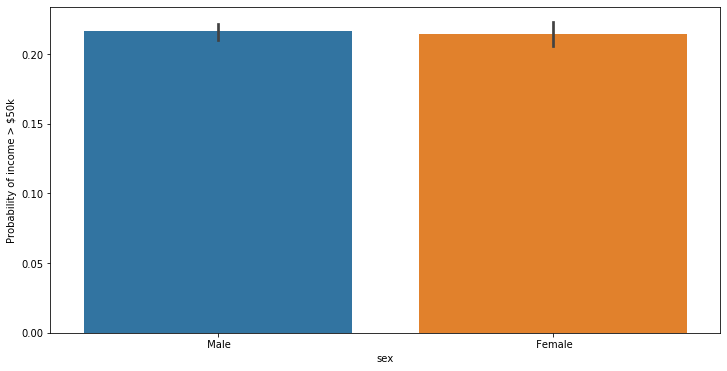

In [0]:
# grafici sulla ground truth dopo il pre processing
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

plt.figure(figsize=(12,6))
ax=sns.barplot(x='sex',y='truth', data=frame)
ax.set(ylabel='Probability of income > $50k')
plt.savefig("train_fair_gender.png")
files.download("train_fair_gender.png")

plt.figure(figsize=(12,6))
ax=sns.barplot(x='sex',y='hours-per-week', data=frame)
ax.set(ylabel='Hours per week')
plt.savefig("train_fair_gender_hours.png")
files.download("train_fair_gender_hours.png")

plt.figure(figsize=(12,6))
ax=sns.barplot(x='sex',y='education-num', data=frame)
ax.set(ylabel='Years of education')
plt.savefig("train_fair_gender_education.png")
files.download("train_fair_gender_education.png")

plt.figure(figsize=(25,6))
ax=sns.barplot(x='education',y='truth', data=frame, hue='sex')
ax.set(ylabel='Probability of income > $50k')
plt.savefig("train_fair_gender_education_level.png")
files.download("train_fair_gender_education_level.png")

plt.figure(figsize=(25,6))
ax=sns.barplot(x='occupation',y='truth', data=frame, hue='sex')
ax.set(ylabel='Probability of income > $50k')
plt.savefig("train_fair_gender_occupation_level.png")
files.download("train_fair_gender_occupation_level.png")

In [0]:
# parity su dataset reso fair
up = len(frame[(frame['sex'] == ' Male') & (frame['truth'] == 1)])
nu = len(frame[(frame['sex'] == ' Male')])
dp = len(frame[(frame['sex'] == ' Female') & (frame['truth'] == 1)])
nd = len(frame[(frame['sex'] == ' Female')])
print("Statistical parity males vs females",up/nu - dp/nd)

occupations = frame['occupation'].unique()
for edu in occupations:
  uomini = len(frame[(frame['sex'] == ' Male') & (frame['truth'] == 1) & (frame['occupation'] == edu)])
  uomini_tot = len(frame[(frame['sex'] == ' Male') & (frame['occupation'] == edu)])
  donne = len(frame[(frame['sex'] == ' Female') & (frame['truth'] == 1) & (frame['occupation'] == edu)])
  donne_tot = len(frame[(frame['sex'] == ' Female') & (frame['occupation'] == edu)])

  if ((uomini_tot != 0) and (donne_tot != 0)):
    print(edu, uomini/uomini_tot - donne/donne_tot)

educations = frame['education'].unique()
for edu in educations:
  uomini = len(frame[(frame['sex'] == ' Male') & (frame['truth'] == 1) & (frame['education'] == edu)])
  uomini_tot = len(frame[(frame['sex'] == ' Male') & (frame['education'] == edu)])
  donne = len(frame[(frame['sex'] == ' Female') & (frame['truth'] == 1) & (frame['education'] == edu)])
  donne_tot = len(frame[(frame['sex'] == ' Female') & (frame['education'] == edu)])

  if ((uomini_tot != 0) and (donne_tot != 0)):
    print(edu, uomini/uomini_tot - donne/donne_tot)

Statistical parity males vs females 0.0017674723522783098
 Other-service -0.0053641446296060075
 Farming-fishing 0.04801407742584213
 Handlers-cleaners 0.00810011376564277
 Adm-clerical 0.026162445348717284
 Sales 0.08928847044296959
 Machine-op-inspct 0.06024664329281834
 Priv-house-serv -0.008264462809917356
 Craft-repair 0.016205028221049605
 Prof-specialty -0.07530299392116474
 Tech-support -0.038000787091696187
 Transport-moving -0.021374612627766548
 Protective-serv 0.07421047321158308
 Exec-managerial -0.02474963745518599
 9th -0.03554778554778555
 5th-6th -0.01634615384615385
 11th 0.027135384403606584
 7th-8th 0.05600071225071225
 10th 0.08303831327196916
 Preschool 0.0
 1st-4th 0.0594059405940594
 HS-grad 0.04147966030845049
 Some-college 0.04662799314054972
 12th 0.06252467607049281
 Assoc-voc -0.049322623980624786
 Assoc-acdm -0.05761158640135858
 Bachelors -0.07141174717668936
 Masters -0.22130080985026512
 Doctorate -0.2664735287434674
 Prof-school -0.1725450677415743


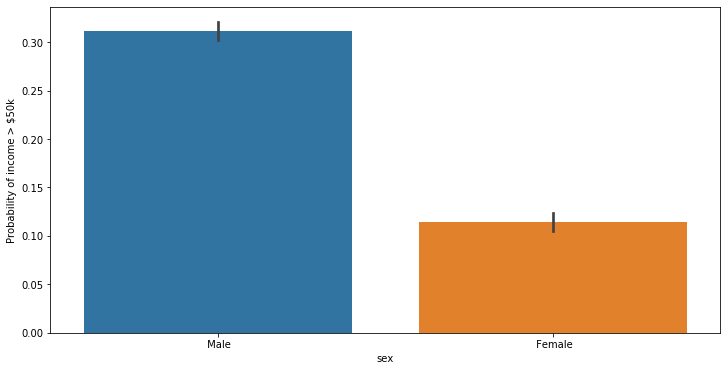

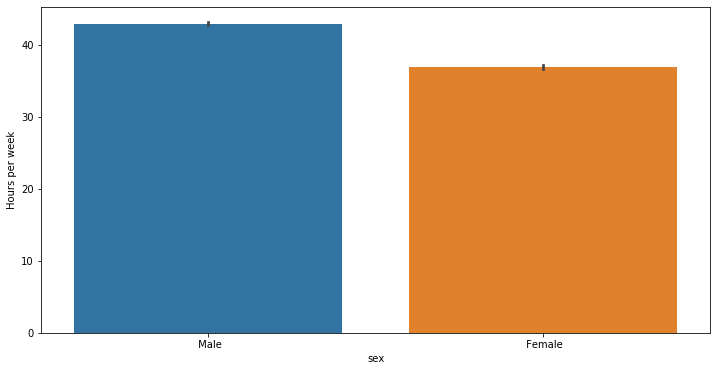

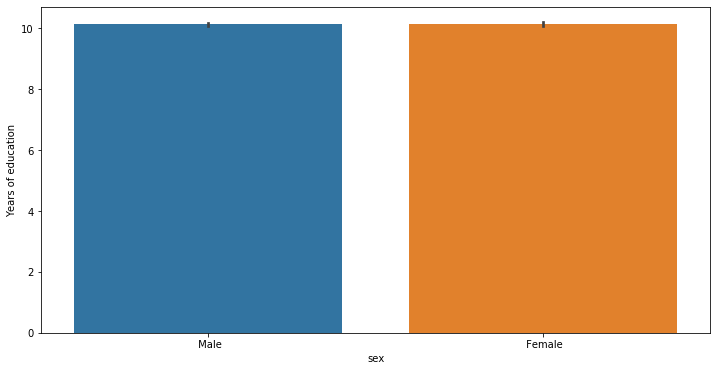

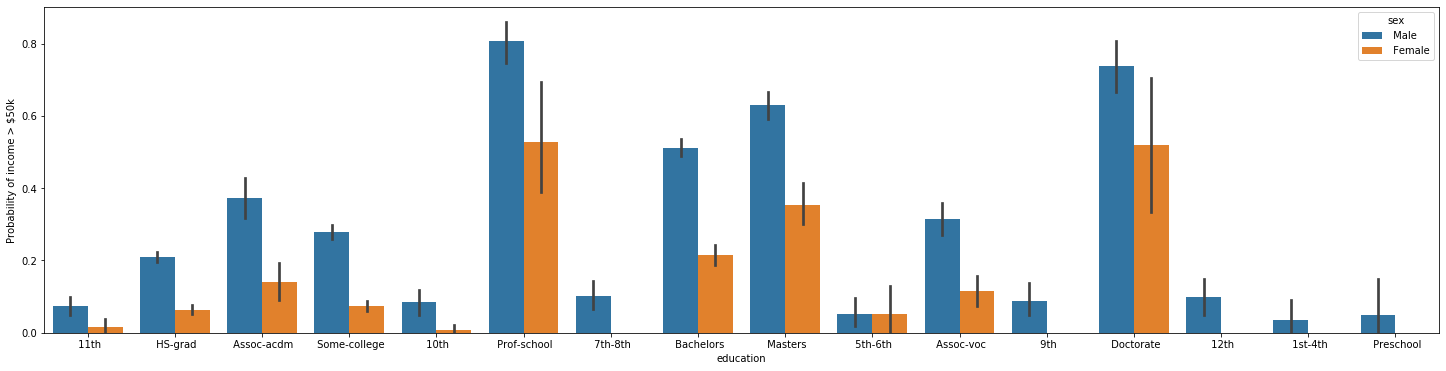

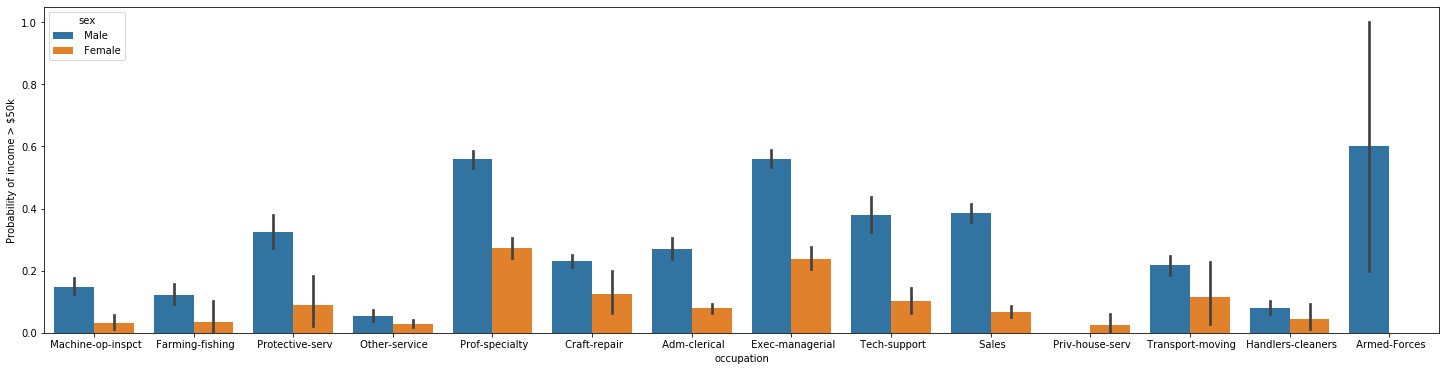

In [0]:
# plot del test set non fair
test_data = test_data.replace(" >50K.", 1)
test_data = test_data.replace(" <=50K.", 0)
plt.figure(figsize=(12,6))
ax=sns.barplot(x='sex',y='salary', data=test_data)
ax.set(ylabel='Probability of income > $50k')
plt.savefig("test_not_fair_gender.png")
files.download("test_not_fair_gender.png")


plt.figure(figsize=(12,6))
ax=sns.barplot(x='sex',y='hours-per-week', data=test_data)
ax.set(ylabel='Hours per week')
plt.savefig("test_not_fair_gender_hours.png")
files.download("test_not_fair_gender_hours.png")

plt.figure(figsize=(12,6))
ax=sns.barplot(x='sex',y='education-num', data=test_data)
ax.set(ylabel='Years of education')
plt.savefig("test_not_fair_gender_education.png")
files.download("test_not_fair_gender_education.png")

plt.figure(figsize=(25,6))
ax=sns.barplot(x='education',y='salary', data=test_data, hue='sex')
ax.set(ylabel='Probability of income > $50k')
plt.savefig("test_not_fair_gender_education_level.png")
files.download("test_not_fair_gender_education_level.png")

plt.figure(figsize=(25,6))
ax=sns.barplot(x='occupation',y='salary', data=test_data, hue='sex')
ax.set(ylabel='Probability of income > $50k')
plt.savefig("test_not_fair_gender_occupation_level.png")
files.download("test_not_fair_gender_occupation_level.png")

In [0]:
train_Y = frame['truth']
frame = frame.drop(columns=['truth'])
frame = frame.drop(columns=['prob'])
frame = frame.drop(columns=['education'])
frame = frame.drop(columns=['sex'])
frame = frame.drop(columns=['occupation'])
logistic_model.fit(frame, train_Y)
predict_test = logistic_model.predict(test_X)
print("Model's Accuracy test:",logistic_model.score(test_X, test_Y))
test_X['prediction'] = predict_test
test_X['sex'] = sex_test
test_X['truth'] = test_Y
test_X['education'] = education_test
test_X['occupation'] = occupation_test

'''
plt.figure(figsize=(12,6))
ax=sns.barplot(x='sex',y='prediction', data=test_X)
ax.set(ylabel='Probability of income > $50k')
plt.savefig("predictions_test_fair_gender.png")
files.download("predictions_test_fair_gender.png")


plt.figure(figsize=(25,6))
ax=sns.barplot(x='occupation',y='prediction', data=test_X, hue='sex')
ax.set(ylabel='Probability of income > $50k')
plt.savefig("predictions_test_fair_gender_occupation_level.png")
files.download("predictions_test_fair_gender_occupation_level.png")

plt.figure(figsize=(25,6))
ax=sns.barplot(x='education',y='prediction', data=test_X, hue='sex')
ax.set(ylabel='Probability of income > $50k')
plt.savefig("predictions_test_fair_gender_education_level.png")
files.download("predictions_test_fair_gender_education_level.png")

# metriche su predictions

up = len(test_X[(test_X['sex'] == ' Male') & (test_X['prediction'] == 1)])
nu = len(test_X[(test_X['sex'] == ' Male')])
dp = len(test_X[(test_X['sex'] == ' Female') & (test_X['prediction'] == 1)])
nd = len(test_X[(test_X['sex'] == ' Female')])
print("Statistical parity males vs females on predictions",up/nu - dp/nd)

# uomini donne
# uomini fP
ufp = len(test_X[(test_X['sex'] == ' Male') & (test_X['truth'] == 0) & (test_X['prediction'] == 1)])
utp = len(test_X[(test_X['sex'] == ' Male') & (test_X['truth'] == 1) & (test_X['prediction'] == 1)])

uratio = ufp/(ufp+utp)

dfp = len(test_X[(test_X['sex'] == ' Female') & (test_X['truth'] == 0) & (test_X['prediction'] == 1)])
dtp = len(test_X[(test_X['sex'] == ' Female') & (test_X['truth'] == 1) & (test_X['prediction'] == 1)])
dratio = dfp/(dfp+dtp)

print("FP Ratio Male|Female")
print(uratio, dratio)

# false negative
# uomini donne
# uomini fN
ufp = len(test_X[(test_X['sex'] == ' Male') & (test_X['truth'] == 1) & (test_X['prediction'] == 0)])
utp = len(test_X[(test_X['sex'] == ' Male') & (test_X['truth'] == 0) & (test_X['prediction'] == 0)])

uratio = ufp/(ufp+utp)

dfp = len(test_X[(test_X['sex'] == ' Female') & (test_X['truth'] == 1) & (test_X['prediction'] == 0)])
dtp = len(test_X[(test_X['sex'] == ' Female') & (test_X['truth'] == 0) & (test_X['prediction'] == 0)])
dratio = dfp/(dfp+dtp)

print("FN Ratio Male|Female")
print(uratio, dratio)'''

Model's Accuracy test: 0.8118195956454122


'\nplt.figure(figsize=(12,6))\nax=sns.barplot(x=\'sex\',y=\'prediction\', data=test_X)\nax.set(ylabel=\'Probability of income > $50k\')\nplt.savefig("predictions_test_fair_gender.png")\nfiles.download("predictions_test_fair_gender.png")\n\n\nplt.figure(figsize=(25,6))\nax=sns.barplot(x=\'occupation\',y=\'prediction\', data=test_X, hue=\'sex\')\nax.set(ylabel=\'Probability of income > $50k\')\nplt.savefig("predictions_test_fair_gender_occupation_level.png")\nfiles.download("predictions_test_fair_gender_occupation_level.png")\n\nplt.figure(figsize=(25,6))\nax=sns.barplot(x=\'education\',y=\'prediction\', data=test_X, hue=\'sex\')\nax.set(ylabel=\'Probability of income > $50k\')\nplt.savefig("predictions_test_fair_gender_education_level.png")\nfiles.download("predictions_test_fair_gender_education_level.png")\n\n# metriche su predictions\n\nup = len(test_X[(test_X[\'sex\'] == \' Male\') & (test_X[\'prediction\'] == 1)])\nnu = len(test_X[(test_X[\'sex\'] == \' Male\')])\ndp = len(test_X[(t